# Part 27: Linear Regression

http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-27-linear.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

%matplotlib inline

In [2]:
os.chdir('/home/sindhuvarun/github/ML-Learning/staticsAndProbability/PythonForDataAnalytics/dataset/mtcars')
mtcars = pd.read_csv('mtcars.csv')
mtcars.index=mtcars['model']
del mtcars['model']
mtcars.head(5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Linear Regression Basics

mtcars data set. Use linear regression to predict vehicle gas mileage based on vehicle weight. 

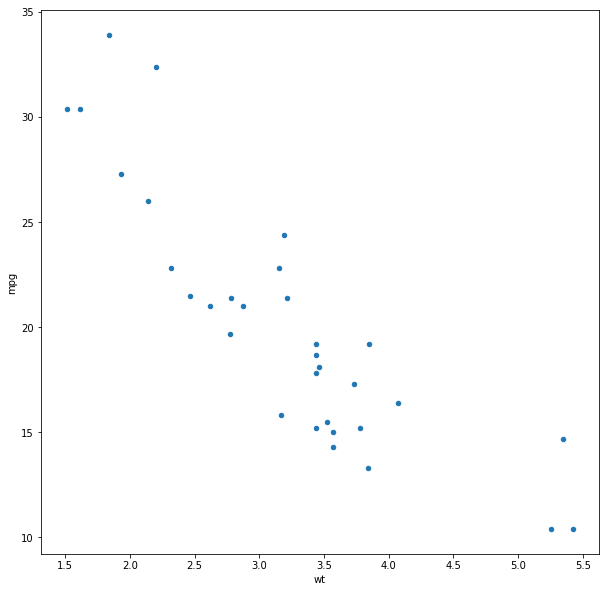

In [3]:
# Scatterplot of weight and mpg to know the corelation
mtcars.plot(kind='scatter',
           x="wt", y='mpg',
           figsize=(10,10))

The scatterplot shows a roughly linear relationship between weight and mpg, suggesting a linear regression model might work well.

In [4]:
from sklearn import linear_model

regression_model = linear_model.LinearRegression()
regression_model.fit(X = pd.DataFrame(mtcars['wt']), y=mtcars['mpg'])

print(regression_model.intercept_)
print(regression_model.coef_)

37.28512616734203
[-5.34447157]


In [5]:
regression_model.score(X=pd.DataFrame(mtcars['wt']), y=mtcars['mpg'])

0.7528327936582646

In [6]:
train_prediction = regression_model.predict(X = pd.DataFrame(mtcars['wt']))

residuals = mtcars['mpg'] - train_prediction

residuals.describe()

count    3.200000e+01
mean     3.552714e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

Outliers can have a large influence on linear regression models. Since regression deals with minimizing squared residuals, large residuals have a disproportionately large influence on the model. 

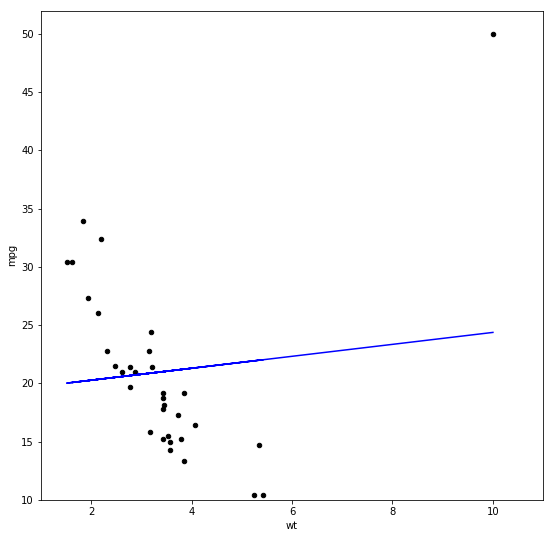

In [7]:
# Add outliers to mtcars data and check linear regression go haywire

mtcars_subset = mtcars[["mpg", "wt"]]
super_car = pd.DataFrame({'mpg':50, 'wt':10}, index=['super']) # Adding a new car "Super", which is heavy but has good mpg

new_cars = mtcars_subset.append(super_car)

# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the new_cars data
regression_model.fit(X = pd.DataFrame(new_cars['wt']), y=new_cars['mpg'])

train_pred2 = regression_model.predict(X = pd.DataFrame(new_cars['wt']))

new_cars.plot(kind='scatter', x='wt', y='mpg', figsize=(9,9), color='black', xlim=(1,11), ylim=(10,52))

plt.plot(new_cars['wt'], train_pred2, color='blue')

In a well-behaved linear regression model, we'd like the residuals to be roughly normally distributed. That is, we'd like a roughly even spread of error above and below the regression line. We can investigate the normality of residuals with a Q-Q (quantile-quantile) plot. Make a qqplot by passing the residuals to the stats.probplot() function in the scipy.stats library:

((array([-2.02511189, -1.62590278, -1.38593914, -1.20666642, -1.05953591,
         -0.93235918, -0.81872017, -0.71478609, -0.6180591 , -0.52680137,
         -0.43973827, -0.35589149, -0.27447843, -0.19484777, -0.11643566,
         -0.03873405,  0.03873405,  0.11643566,  0.19484777,  0.27447843,
          0.35589149,  0.43973827,  0.52680137,  0.6180591 ,  0.71478609,
          0.81872017,  0.93235918,  1.05953591,  1.20666642,  1.38593914,
          1.62590278,  2.02511189]),
  array([-4.54315128, -3.90536265, -3.72686632, -3.46235533, -3.20536265,
         -2.97258623, -2.78093991, -2.61100374, -2.28261065, -2.08595212,
         -1.88302362, -1.10014396, -1.0274952 , -0.9197704 , -0.69325453,
         -0.20014396, -0.0502472 ,  0.152043  ,  0.29985604,  0.35642633,
          0.86687313,  1.17334959,  1.20105932,  1.29734994,  1.74619542,
          2.10328764,  2.34995929,  2.46436703,  4.16373815,  5.98107439,
          6.42197917,  6.87271129])),
 (3.032779748945897, 3.79472125328682

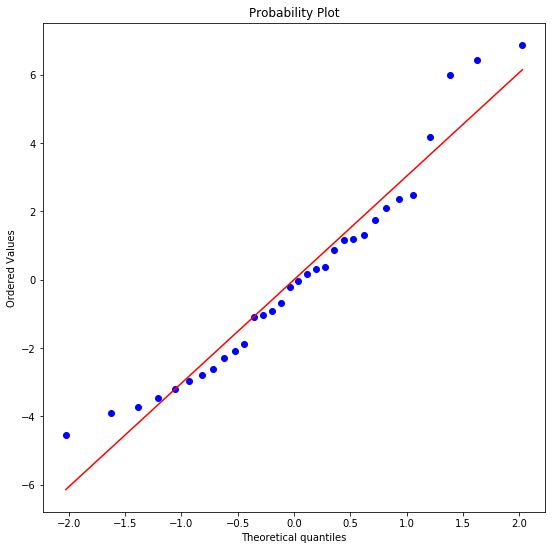

In [8]:
plt.figure(figsize=(9,9))

stats.probplot(residuals, dist='norm', plot=plt)

When residuals are normally distributed, they tend to lie along the straight line on the Q-Q plot. In this case residuals appear to follow a slightly non-linear pattern: the residuals are bowed a bit away from the normality line on each end. This is an indication that simple straight line might not be sufficient to fully describe the relationship between weight and mpg.

RMSE - Root Mean Square Error

Root mean squared error is square root of the average of the squared error (residuals.)
RMSE can be used as evaluation metric, other than the R2 method used earlier

In [10]:
def rmse(predicted, targets):
    return np.sqrt(np.mean((targets - predicted)**2))
rmse(train_prediction, mtcars['mpg'])

2.949162685955028

In [12]:
# RMSE using built-in function
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction, mtcars['mpg'])**0.5
RMSE

2.949162685955028

### Polynomial Regression

In [13]:
poly_model = linear_model.LinearRegression()

predictors = pd.DataFrame([mtcars['wt'], mtcars['wt']**2]).T

poly_model.fit(X=predictors, y=mtcars['mpg'])

print("Model intercept")

print(poly_model.intercept_)

print("Model coefficients")
print(poly_model.coef_)

poly_model.score(X=predictors, y=mtcars['mpg'])

Model intercept
49.9308109494518
Model coefficients
[-13.38033708   1.17108689]


0.8190613581384095

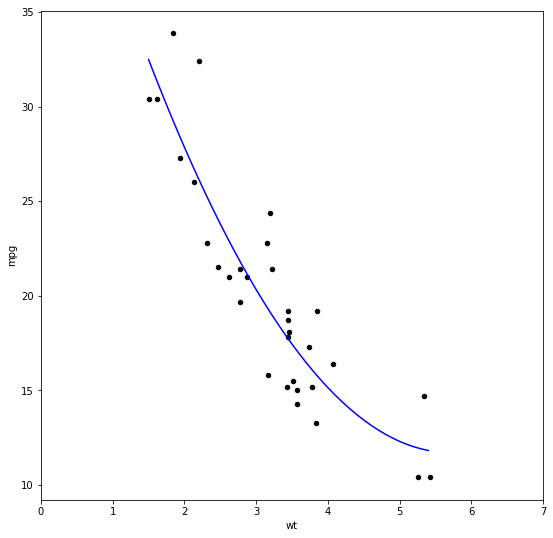

In [14]:
poly_line_range = np.arange(1.5, 5.5, 0.1)

poly_line_predictors = pd.DataFrame([poly_line_range, poly_line_range**2]).T

y_values = poly_model.predict(X=poly_line_predictors)

mtcars.plot(kind='scatter', x='wt', y='mpg', figsize=(9,9), color='black', xlim=(0,7))

plt.plot(poly_line_range, y_values, color='blue')

In [15]:
preds = poly_model.predict(X=predictors)
rmse(preds, mtcars['mpg'])

2.5233004724610786

### Multiple Linear Regression

In [17]:
multi_reg_model = linear_model.LinearRegression()

multi_reg_model.fit(X=mtcars.loc[:, ['wt', 'hp']],
                   y=mtcars['mpg'])

print("Intercepts")
print(multi_reg_model.intercept_)

print("Coefficients")
print(multi_reg_model.coef_)

multi_reg_model.score(X=mtcars.loc[:,['wt', 'hp']], y=mtcars['mpg'])

Intercepts
37.2272701164472
Coefficients
[-3.87783074 -0.03177295]


0.8267854518827914

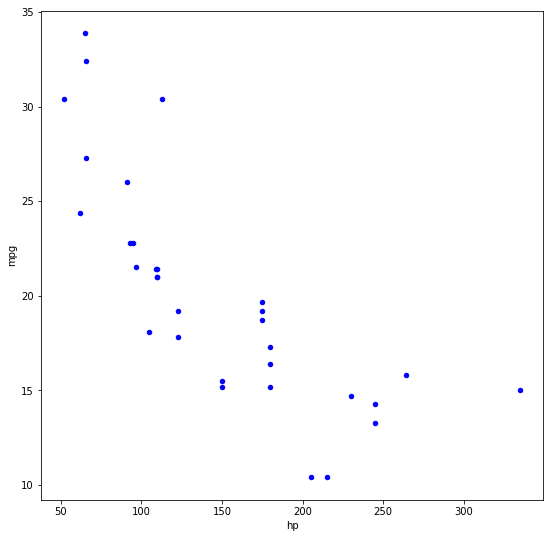

In [18]:
mtcars.plot(kind='scatter', x='hp', y='mpg', figsize=(9,9), color='blue')

While mpg does tend to decline with horsepower, the relationship appears more curved than linear so adding polynomial terms to our multiple regression model could yield a better fit:

In [21]:
multi_reg_model2 = linear_model.LinearRegression()

poly_predictors = pd.DataFrame([mtcars['wt'], mtcars['hp'], mtcars['wt']**2, mtcars['hp']**2]).T

multi_reg_model2.fit(X=poly_predictors, y=mtcars['mpg'])

print("R-Squared")
print(multi_reg_model2.score(X=poly_predictors, y=mtcars['mpg']))

print("RMSE")
print(rmse(multi_reg_model2.predict(X=poly_predictors), mtcars['mpg']))

R-Squared
0.890727954967064
RMSE
1.9609108134176996


We could continue adding more explanatory variables in an attempt to improve the model. Adding variables that have little relationship with the response or including variables that are too closely related to one another can hurt your results when using linear regression. You should also be wary of numeric variables that take on few unique values since they often act more like categorical variables than numeric ones.